In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\099\AppData\Local\Temp/ipykernel_52180/4216924255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');


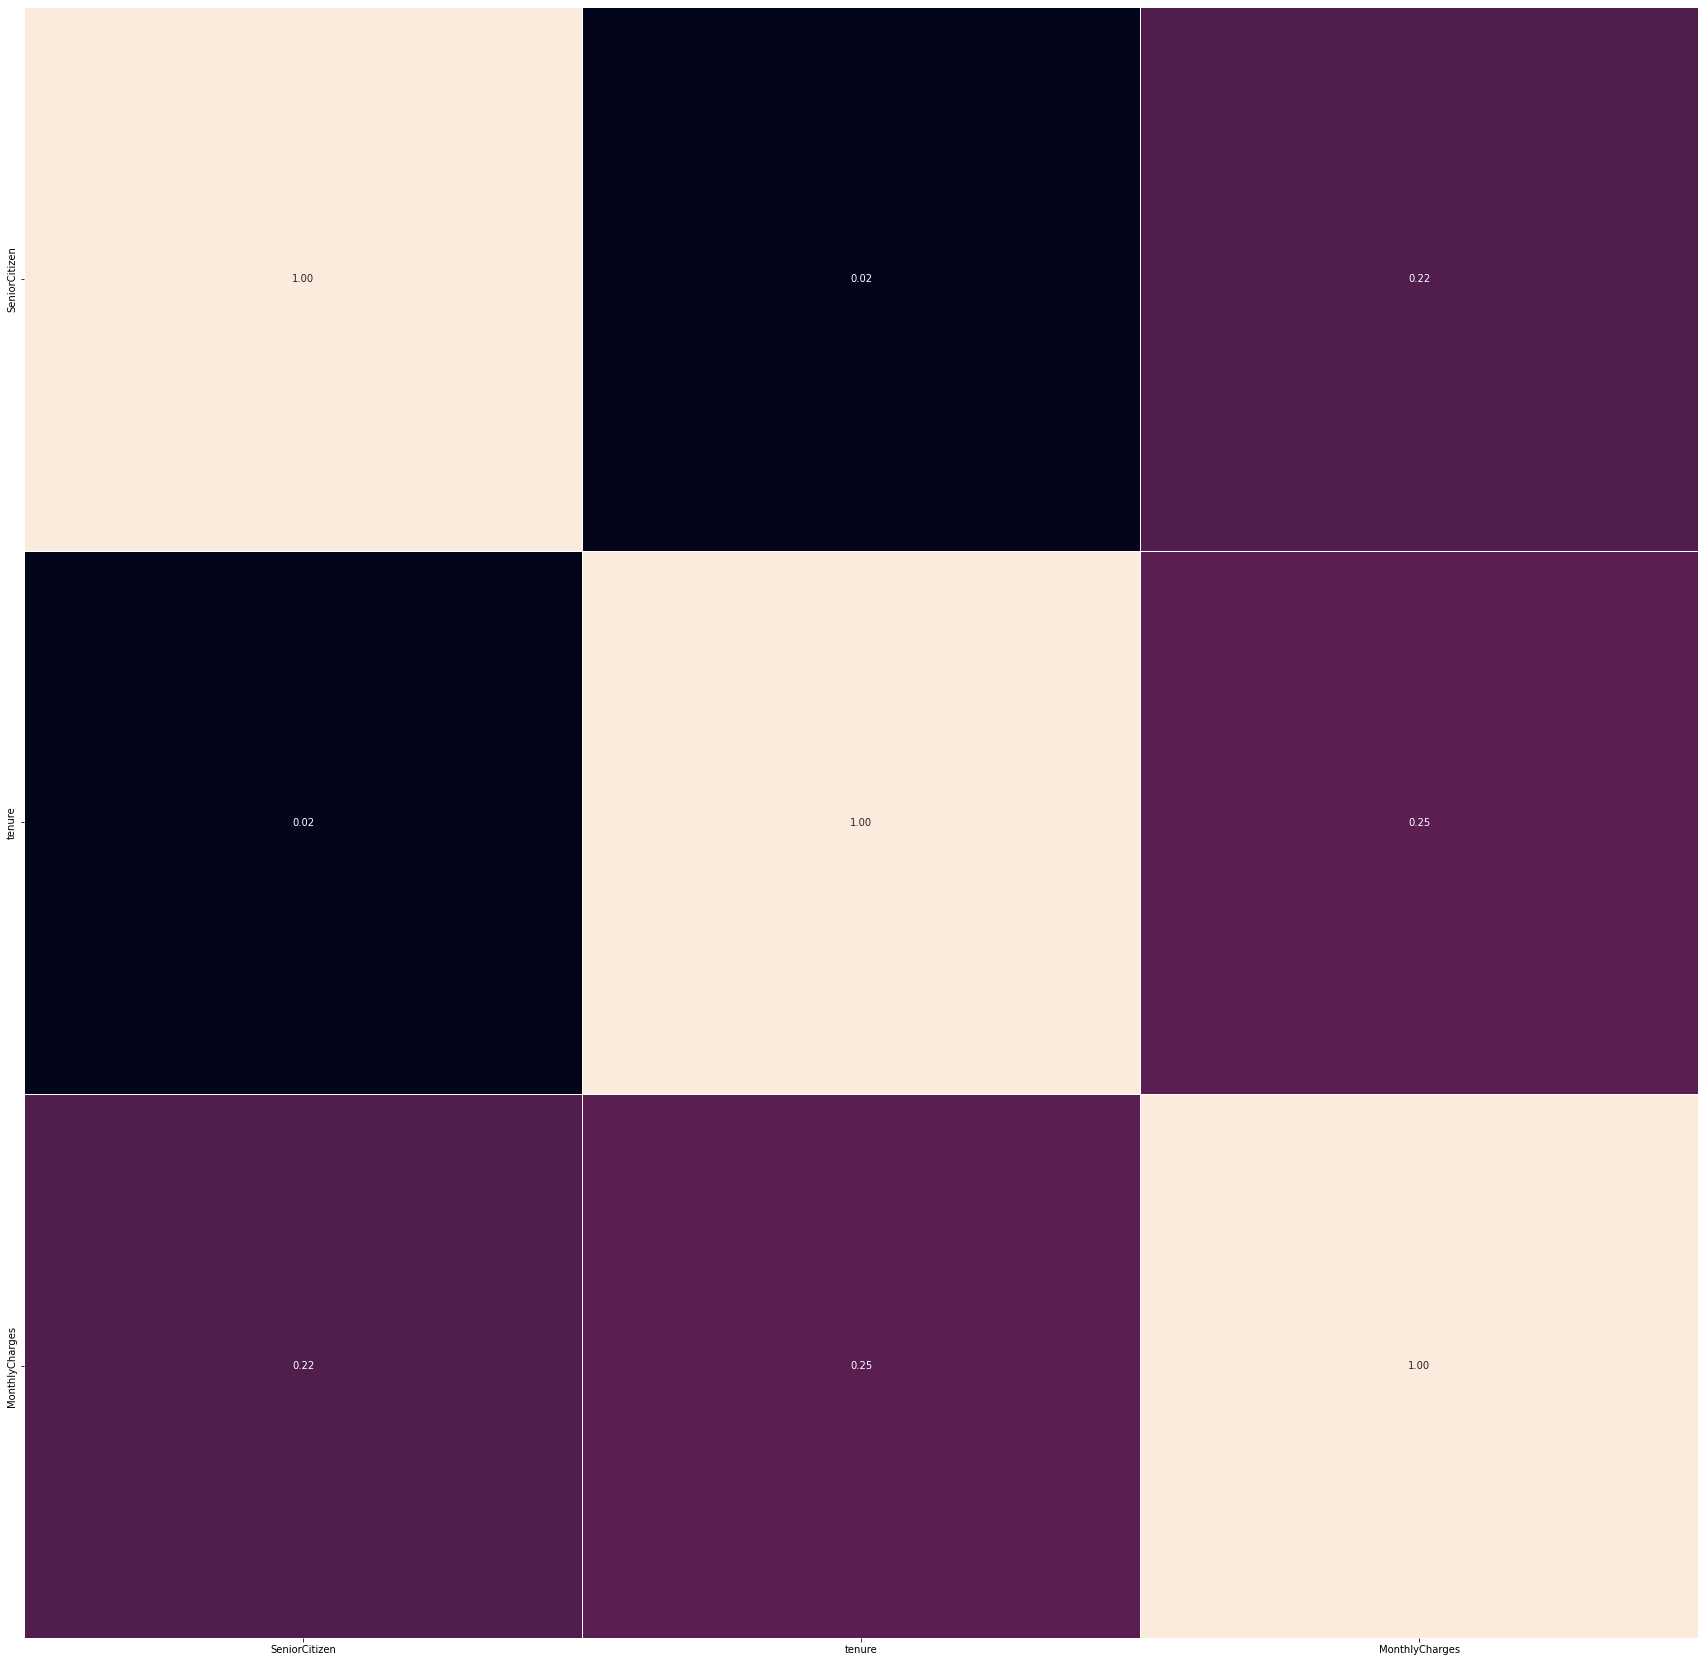

In [5]:
plt.figure(figsize=(30, 30));
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');
plt.show();

In [6]:
# Корреляция между признаками практически отсутсвует 

In [7]:
data.drop(columns = ['customerID', 'MultipleLines', 'TotalCharges'], axis = 1, inplace = True) 

In [8]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
data["gender"] = lenc.fit_transform(data["gender"])
data["Churn"] = lenc.fit_transform(data["Churn"])
data["Partner"] = lenc.fit_transform(data["Partner"])
data["Dependents"] = lenc.fit_transform(data["Dependents"])
data["PhoneService"] = lenc.fit_transform(data["PhoneService"])
data["PaperlessBilling"] = lenc.fit_transform(data["PaperlessBilling"])

In [9]:
from category_encoders import OneHotEncoder
enc = OneHotEncoder()

data = data.drop(['StreamingTV', 'StreamingMovies', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod'], axis = 1).join(enc.fit_transform(data[['StreamingTV', 'StreamingMovies', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod']], axis = 0))

#### Кодирование с помощью OneHotEncoder в данном случае сделано для категориальных переменных, количество различных значений которых больше 2. Для остальных категориальных переменных - LabelEncoder.

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,StreamingTV_1,...,TechSupport_1,TechSupport_2,TechSupport_3,Contract_1,Contract_2,Contract_3,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4
0,0,0,1,0,1,0,1,29.85,0,1,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,34,1,0,56.95,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,1,1,...,1,0,0,1,0,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,1,1,...,1,0,0,1,0,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Churn'], axis=1), data['Churn'], test_size=0.30, random_state=42
)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7043 non-null   int32  
 1   SeniorCitizen       7043 non-null   int64  
 2   Partner             7043 non-null   int32  
 3   Dependents          7043 non-null   int32  
 4   tenure              7043 non-null   int64  
 5   PhoneService        7043 non-null   int32  
 6   PaperlessBilling    7043 non-null   int32  
 7   MonthlyCharges      7043 non-null   float64
 8   Churn               7043 non-null   int32  
 9   StreamingTV_1       7043 non-null   int64  
 10  StreamingTV_2       7043 non-null   int64  
 11  StreamingTV_3       7043 non-null   int64  
 12  StreamingMovies_1   7043 non-null   int64  
 13  StreamingMovies_2   7043 non-null   int64  
 14  StreamingMovies_3   7043 non-null   int64  
 15  InternetService_1   7043 non-null   int64  
 16  Intern

In [13]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

0.7108347879635855
0.5835806132542037


In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50, 100, 150, 200, 250, 300], 'learning_rate':[0.1, 0.2, 0.5, 1, 2]}

gs = GridSearchCV(clf, parameters, cv = 5, scoring = 'f1', verbose = 2)
gs.fit(X_train, y_train)
print('Best params: ', gs.best_params_)
print('Best accuracy: ', gs.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.5s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   0.8s
[CV] END ................learning_rate=0.1, n_e

[CV] END ..................learning_rate=1, n_estimators=150; total time=   0.9s
[CV] END ..................learning_rate=1, n_estimators=150; total time=   0.9s
[CV] END ..................learning_rate=1, n_estimators=150; total time=   0.9s
[CV] END ..................learning_rate=1, n_estimators=150; total time=   0.9s
[CV] END ..................learning_rate=1, n_estimators=200; total time=   1.2s
[CV] END ..................learning_rate=1, n_estimators=200; total time=   1.2s
[CV] END ..................learning_rate=1, n_estimators=200; total time=   1.3s
[CV] END ..................learning_rate=1, n_estimators=200; total time=   1.2s
[CV] END ..................learning_rate=1, n_estimators=200; total time=   1.3s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   1.5s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   1.5s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   1.5s
[CV] END ..................l

In [96]:
#!pip install xgboost
#! pip install lightgbm
#! pip install catboost

In [21]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.63      0.52      0.57       574

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

0.7022841656987997
0.568683957732949


In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,4,5,6], 'eta':[0.1, 0.2, 1]}

gs = GridSearchCV(clf, parameters, cv = 5, scoring = 'f1', verbose = 2)
gs.fit(X_train, y_train)
print('Best params: ', gs.best_params_)
print('Best accuracy: ', gs.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............................eta=0.1, max_depth=3; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=3; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=3; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=3; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=3; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.2s
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=5; total time=   0.2s
[CV] END ...............................eta=0.1,

In [23]:
from catboost import CatBoostClassifier 

clf = CatBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

Learning rate set to 0.02036
0:	learn: 0.6800353	total: 178ms	remaining: 2m 58s
1:	learn: 0.6671742	total: 190ms	remaining: 1m 34s
2:	learn: 0.6527810	total: 198ms	remaining: 1m 5s
3:	learn: 0.6413539	total: 203ms	remaining: 50.6s
4:	learn: 0.6296683	total: 208ms	remaining: 41.4s
5:	learn: 0.6189524	total: 213ms	remaining: 35.2s
6:	learn: 0.6091648	total: 217ms	remaining: 30.7s
7:	learn: 0.5989963	total: 221ms	remaining: 27.4s
8:	learn: 0.5896334	total: 225ms	remaining: 24.7s
9:	learn: 0.5811776	total: 229ms	remaining: 22.7s
10:	learn: 0.5736360	total: 233ms	remaining: 20.9s
11:	learn: 0.5660469	total: 237ms	remaining: 19.5s
12:	learn: 0.5589498	total: 241ms	remaining: 18.3s
13:	learn: 0.5527336	total: 245ms	remaining: 17.3s
14:	learn: 0.5463323	total: 249ms	remaining: 16.4s
15:	learn: 0.5398453	total: 254ms	remaining: 15.6s
16:	learn: 0.5336812	total: 258ms	remaining: 14.9s
17:	learn: 0.5281062	total: 262ms	remaining: 14.3s
18:	learn: 0.5228766	total: 266ms	remaining: 13.7s
19:	learn:

160:	learn: 0.3911549	total: 884ms	remaining: 4.61s
161:	learn: 0.3908921	total: 888ms	remaining: 4.59s
162:	learn: 0.3907659	total: 893ms	remaining: 4.58s
163:	learn: 0.3905074	total: 898ms	remaining: 4.58s
164:	learn: 0.3902970	total: 903ms	remaining: 4.57s
165:	learn: 0.3900589	total: 907ms	remaining: 4.56s
166:	learn: 0.3898596	total: 912ms	remaining: 4.55s
167:	learn: 0.3895848	total: 918ms	remaining: 4.54s
168:	learn: 0.3893894	total: 923ms	remaining: 4.54s
169:	learn: 0.3892218	total: 927ms	remaining: 4.53s
170:	learn: 0.3890950	total: 932ms	remaining: 4.52s
171:	learn: 0.3889780	total: 937ms	remaining: 4.51s
172:	learn: 0.3888709	total: 940ms	remaining: 4.5s
173:	learn: 0.3886765	total: 945ms	remaining: 4.48s
174:	learn: 0.3885166	total: 949ms	remaining: 4.47s
175:	learn: 0.3883456	total: 954ms	remaining: 4.47s
176:	learn: 0.3881918	total: 959ms	remaining: 4.46s
177:	learn: 0.3880917	total: 964ms	remaining: 4.45s
178:	learn: 0.3879026	total: 968ms	remaining: 4.44s
179:	learn: 0

336:	learn: 0.3655408	total: 1.76s	remaining: 3.46s
337:	learn: 0.3654491	total: 1.76s	remaining: 3.46s
338:	learn: 0.3653788	total: 1.77s	remaining: 3.45s
339:	learn: 0.3651646	total: 1.77s	remaining: 3.45s
340:	learn: 0.3650466	total: 1.78s	remaining: 3.44s
341:	learn: 0.3649078	total: 1.78s	remaining: 3.44s
342:	learn: 0.3648448	total: 1.79s	remaining: 3.43s
343:	learn: 0.3646277	total: 1.8s	remaining: 3.42s
344:	learn: 0.3645724	total: 1.8s	remaining: 3.42s
345:	learn: 0.3645144	total: 1.8s	remaining: 3.41s
346:	learn: 0.3643931	total: 1.81s	remaining: 3.41s
347:	learn: 0.3642212	total: 1.81s	remaining: 3.4s
348:	learn: 0.3641063	total: 1.82s	remaining: 3.39s
349:	learn: 0.3640356	total: 1.82s	remaining: 3.39s
350:	learn: 0.3638668	total: 1.83s	remaining: 3.38s
351:	learn: 0.3636837	total: 1.83s	remaining: 3.37s
352:	learn: 0.3636155	total: 1.84s	remaining: 3.37s
353:	learn: 0.3634510	total: 1.84s	remaining: 3.36s
354:	learn: 0.3633165	total: 1.84s	remaining: 3.35s
355:	learn: 0.36

528:	learn: 0.3421121	total: 2.67s	remaining: 2.38s
529:	learn: 0.3420010	total: 2.67s	remaining: 2.37s
530:	learn: 0.3419333	total: 2.68s	remaining: 2.37s
531:	learn: 0.3417809	total: 2.69s	remaining: 2.36s
532:	learn: 0.3416554	total: 2.7s	remaining: 2.37s
533:	learn: 0.3415488	total: 2.71s	remaining: 2.36s
534:	learn: 0.3414399	total: 2.71s	remaining: 2.36s
535:	learn: 0.3413302	total: 2.72s	remaining: 2.35s
536:	learn: 0.3412571	total: 2.72s	remaining: 2.35s
537:	learn: 0.3411037	total: 2.73s	remaining: 2.34s
538:	learn: 0.3410498	total: 2.73s	remaining: 2.34s
539:	learn: 0.3409845	total: 2.74s	remaining: 2.33s
540:	learn: 0.3408751	total: 2.74s	remaining: 2.33s
541:	learn: 0.3407478	total: 2.75s	remaining: 2.32s
542:	learn: 0.3406210	total: 2.75s	remaining: 2.31s
543:	learn: 0.3404992	total: 2.76s	remaining: 2.31s
544:	learn: 0.3403487	total: 2.76s	remaining: 2.3s
545:	learn: 0.3402294	total: 2.77s	remaining: 2.3s
546:	learn: 0.3401073	total: 2.77s	remaining: 2.29s
547:	learn: 0.3

711:	learn: 0.3235690	total: 3.54s	remaining: 1.43s
712:	learn: 0.3234685	total: 3.55s	remaining: 1.43s
713:	learn: 0.3233749	total: 3.55s	remaining: 1.42s
714:	learn: 0.3232801	total: 3.56s	remaining: 1.42s
715:	learn: 0.3231443	total: 3.56s	remaining: 1.41s
716:	learn: 0.3230717	total: 3.57s	remaining: 1.41s
717:	learn: 0.3229977	total: 3.58s	remaining: 1.4s
718:	learn: 0.3229021	total: 3.58s	remaining: 1.4s
719:	learn: 0.3228160	total: 3.59s	remaining: 1.39s
720:	learn: 0.3227445	total: 3.59s	remaining: 1.39s
721:	learn: 0.3226947	total: 3.6s	remaining: 1.38s
722:	learn: 0.3225728	total: 3.6s	remaining: 1.38s
723:	learn: 0.3224483	total: 3.61s	remaining: 1.38s
724:	learn: 0.3223944	total: 3.61s	remaining: 1.37s
725:	learn: 0.3223338	total: 3.62s	remaining: 1.36s
726:	learn: 0.3221712	total: 3.62s	remaining: 1.36s
727:	learn: 0.3220792	total: 3.63s	remaining: 1.35s
728:	learn: 0.3219668	total: 3.63s	remaining: 1.35s
729:	learn: 0.3218932	total: 3.64s	remaining: 1.35s
730:	learn: 0.32

896:	learn: 0.3072194	total: 4.47s	remaining: 513ms
897:	learn: 0.3071133	total: 4.47s	remaining: 508ms
898:	learn: 0.3070672	total: 4.48s	remaining: 503ms
899:	learn: 0.3069705	total: 4.48s	remaining: 498ms
900:	learn: 0.3069357	total: 4.49s	remaining: 493ms
901:	learn: 0.3068300	total: 4.49s	remaining: 488ms
902:	learn: 0.3067079	total: 4.5s	remaining: 483ms
903:	learn: 0.3066269	total: 4.5s	remaining: 478ms
904:	learn: 0.3065932	total: 4.51s	remaining: 473ms
905:	learn: 0.3065479	total: 4.51s	remaining: 468ms
906:	learn: 0.3064690	total: 4.51s	remaining: 463ms
907:	learn: 0.3063515	total: 4.52s	remaining: 458ms
908:	learn: 0.3062700	total: 4.52s	remaining: 453ms
909:	learn: 0.3061891	total: 4.53s	remaining: 448ms
910:	learn: 0.3061293	total: 4.53s	remaining: 443ms
911:	learn: 0.3060283	total: 4.54s	remaining: 438ms
912:	learn: 0.3059049	total: 4.54s	remaining: 433ms
913:	learn: 0.3058484	total: 4.54s	remaining: 428ms
914:	learn: 0.3057580	total: 4.55s	remaining: 423ms
915:	learn: 0.

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

gs = GridSearchCV(clf, parameters, cv = 5, scoring = 'f1', verbose = 2)
gs.fit(X_train, y_train)
print('Best params: ', gs.best_params_)
print('Best accuracy: ', gs.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Learning rate set to 0.152897
0:	learn: 0.6172002	total: 2.24ms	remaining: 221ms
1:	learn: 0.5622819	total: 4.52ms	remaining: 222ms
2:	learn: 0.5221978	total: 8.25ms	remaining: 267ms
3:	learn: 0.4989735	total: 13ms	remaining: 312ms
4:	learn: 0.4813561	total: 17.8ms	remaining: 338ms
5:	learn: 0.4671696	total: 22.5ms	remaining: 352ms
6:	learn: 0.4585553	total: 27.1ms	remaining: 360ms
7:	learn: 0.4514073	total: 31.5ms	remaining: 362ms
8:	learn: 0.4456223	total: 35ms	remaining: 354ms
9:	learn: 0.4411589	total: 37ms	remaining: 333ms
10:	learn: 0.4377705	total: 39.3ms	remaining: 318ms
11:	learn: 0.4347384	total: 41.4ms	remaining: 304ms
12:	learn: 0.4327215	total: 43.7ms	remaining: 293ms
13:	learn: 0.4301854	total: 46ms	remaining: 283ms
14:	learn: 0.4269546	total: 48.3ms	remaining: 274ms
15:	learn: 0.4247740	total: 50.4ms	remaining: 265ms
16:	learn: 0.4231366	total: 52.6ms	remaining: 257ms
17:	learn: 0.4215861	total: 54.6ms	remaining

72:	learn: 0.3908964	total: 169ms	remaining: 62.4ms
73:	learn: 0.3907066	total: 171ms	remaining: 60.2ms
74:	learn: 0.3904784	total: 174ms	remaining: 58ms
75:	learn: 0.3902995	total: 177ms	remaining: 55.7ms
76:	learn: 0.3901575	total: 180ms	remaining: 53.7ms
77:	learn: 0.3899293	total: 183ms	remaining: 51.7ms
78:	learn: 0.3896062	total: 187ms	remaining: 49.7ms
79:	learn: 0.3890902	total: 189ms	remaining: 47.3ms
80:	learn: 0.3887246	total: 193ms	remaining: 45.2ms
81:	learn: 0.3883769	total: 196ms	remaining: 42.9ms
82:	learn: 0.3882142	total: 199ms	remaining: 40.8ms
83:	learn: 0.3879454	total: 202ms	remaining: 38.5ms
84:	learn: 0.3874670	total: 205ms	remaining: 36.1ms
85:	learn: 0.3872796	total: 208ms	remaining: 33.9ms
86:	learn: 0.3868688	total: 211ms	remaining: 31.5ms
87:	learn: 0.3867029	total: 213ms	remaining: 29.1ms
88:	learn: 0.3863285	total: 216ms	remaining: 26.7ms
89:	learn: 0.3859480	total: 219ms	remaining: 24.3ms
90:	learn: 0.3857341	total: 221ms	remaining: 21.9ms
91:	learn: 0.3

52:	learn: 0.4001637	total: 170ms	remaining: 150ms
53:	learn: 0.3998514	total: 173ms	remaining: 147ms
54:	learn: 0.3996685	total: 176ms	remaining: 144ms
55:	learn: 0.3995499	total: 179ms	remaining: 141ms
56:	learn: 0.3991917	total: 182ms	remaining: 138ms
57:	learn: 0.3988418	total: 186ms	remaining: 134ms
58:	learn: 0.3984693	total: 189ms	remaining: 131ms
59:	learn: 0.3981235	total: 192ms	remaining: 128ms
60:	learn: 0.3979243	total: 195ms	remaining: 125ms
61:	learn: 0.3977023	total: 198ms	remaining: 121ms
62:	learn: 0.3975405	total: 201ms	remaining: 118ms
63:	learn: 0.3970811	total: 203ms	remaining: 114ms
64:	learn: 0.3967253	total: 206ms	remaining: 111ms
65:	learn: 0.3962571	total: 209ms	remaining: 108ms
66:	learn: 0.3961538	total: 212ms	remaining: 104ms
67:	learn: 0.3958641	total: 215ms	remaining: 101ms
68:	learn: 0.3954466	total: 217ms	remaining: 97.6ms
69:	learn: 0.3950453	total: 220ms	remaining: 94.2ms
70:	learn: 0.3949053	total: 223ms	remaining: 91.1ms
71:	learn: 0.3947421	total: 

17:	learn: 0.4430935	total: 40.4ms	remaining: 409ms
18:	learn: 0.4396217	total: 43.1ms	remaining: 410ms
19:	learn: 0.4380827	total: 45.4ms	remaining: 408ms
20:	learn: 0.4365820	total: 48.1ms	remaining: 410ms
21:	learn: 0.4346382	total: 51ms	remaining: 412ms
22:	learn: 0.4329908	total: 54ms	remaining: 415ms
23:	learn: 0.4310156	total: 57.1ms	remaining: 419ms
24:	learn: 0.4296761	total: 59.6ms	remaining: 417ms
25:	learn: 0.4286227	total: 62.1ms	remaining: 416ms
26:	learn: 0.4277850	total: 65.1ms	remaining: 417ms
27:	learn: 0.4270368	total: 67.6ms	remaining: 415ms
28:	learn: 0.4265386	total: 70.4ms	remaining: 415ms
29:	learn: 0.4256350	total: 72.8ms	remaining: 412ms
30:	learn: 0.4247404	total: 75.1ms	remaining: 409ms
31:	learn: 0.4239056	total: 77.1ms	remaining: 405ms
32:	learn: 0.4232930	total: 79.3ms	remaining: 401ms
33:	learn: 0.4224640	total: 81.8ms	remaining: 399ms
34:	learn: 0.4216450	total: 84.4ms	remaining: 398ms
35:	learn: 0.4211205	total: 86.4ms	remaining: 394ms
36:	learn: 0.420

Learning rate set to 0.080976
0:	learn: 0.6500762	total: 1.82ms	remaining: 363ms
1:	learn: 0.6130413	total: 4.5ms	remaining: 446ms
2:	learn: 0.5793113	total: 6.8ms	remaining: 447ms
3:	learn: 0.5560467	total: 9.04ms	remaining: 443ms
4:	learn: 0.5339282	total: 11.3ms	remaining: 442ms
5:	learn: 0.5182264	total: 13.3ms	remaining: 430ms
6:	learn: 0.5050806	total: 15.6ms	remaining: 429ms
7:	learn: 0.4925021	total: 17.6ms	remaining: 423ms
8:	learn: 0.4809095	total: 20.3ms	remaining: 430ms
9:	learn: 0.4712355	total: 22.8ms	remaining: 433ms
10:	learn: 0.4643766	total: 24.9ms	remaining: 428ms
11:	learn: 0.4581377	total: 26.7ms	remaining: 419ms
12:	learn: 0.4532629	total: 29.1ms	remaining: 419ms
13:	learn: 0.4490679	total: 31.1ms	remaining: 414ms
14:	learn: 0.4458441	total: 33.2ms	remaining: 409ms
15:	learn: 0.4423585	total: 35.1ms	remaining: 404ms
16:	learn: 0.4396728	total: 38.5ms	remaining: 414ms
17:	learn: 0.4374147	total: 41.4ms	remaining: 419ms
18:	learn: 0.4353277	total: 44.2ms	remaining: 

[CV] END ......................max_depth=3, n_estimators=200; total time=   0.6s
Learning rate set to 0.080976
0:	learn: 0.6500619	total: 2.26ms	remaining: 451ms
1:	learn: 0.6107892	total: 4.97ms	remaining: 492ms
2:	learn: 0.5778181	total: 7.57ms	remaining: 497ms
3:	learn: 0.5528439	total: 9.67ms	remaining: 474ms
4:	learn: 0.5373125	total: 12.2ms	remaining: 478ms
5:	learn: 0.5184138	total: 15ms	remaining: 485ms
6:	learn: 0.5031432	total: 17.2ms	remaining: 475ms
7:	learn: 0.4888745	total: 20.3ms	remaining: 486ms
8:	learn: 0.4795790	total: 23.7ms	remaining: 502ms
9:	learn: 0.4727213	total: 26.1ms	remaining: 496ms
10:	learn: 0.4663713	total: 28.5ms	remaining: 490ms
11:	learn: 0.4607894	total: 30.8ms	remaining: 482ms
12:	learn: 0.4552953	total: 33.9ms	remaining: 487ms
13:	learn: 0.4503515	total: 36.5ms	remaining: 485ms
14:	learn: 0.4466534	total: 39.2ms	remaining: 483ms
15:	learn: 0.4442200	total: 42ms	remaining: 483ms
16:	learn: 0.4414609	total: 44.5ms	remaining: 479ms
17:	learn: 0.438825

179:	learn: 0.3844717	total: 477ms	remaining: 53ms
180:	learn: 0.3842971	total: 480ms	remaining: 50.4ms
181:	learn: 0.3840959	total: 482ms	remaining: 47.7ms
182:	learn: 0.3839793	total: 485ms	remaining: 45ms
183:	learn: 0.3838453	total: 487ms	remaining: 42.4ms
184:	learn: 0.3836790	total: 490ms	remaining: 39.7ms
185:	learn: 0.3835770	total: 492ms	remaining: 37.1ms
186:	learn: 0.3833637	total: 495ms	remaining: 34.4ms
187:	learn: 0.3832261	total: 498ms	remaining: 31.8ms
188:	learn: 0.3830866	total: 502ms	remaining: 29.2ms
189:	learn: 0.3829673	total: 505ms	remaining: 26.6ms
190:	learn: 0.3828925	total: 507ms	remaining: 23.9ms
191:	learn: 0.3827603	total: 510ms	remaining: 21.2ms
192:	learn: 0.3826376	total: 513ms	remaining: 18.6ms
193:	learn: 0.3825745	total: 516ms	remaining: 15.9ms
194:	learn: 0.3824671	total: 519ms	remaining: 13.3ms
195:	learn: 0.3822384	total: 521ms	remaining: 10.6ms
196:	learn: 0.3821082	total: 524ms	remaining: 7.98ms
197:	learn: 0.3819577	total: 527ms	remaining: 5.32

180:	learn: 0.3877526	total: 537ms	remaining: 56.3ms
181:	learn: 0.3876155	total: 539ms	remaining: 53.4ms
182:	learn: 0.3874508	total: 542ms	remaining: 50.4ms
183:	learn: 0.3872682	total: 545ms	remaining: 47.4ms
184:	learn: 0.3871321	total: 547ms	remaining: 44.4ms
185:	learn: 0.3870686	total: 550ms	remaining: 41.4ms
186:	learn: 0.3869438	total: 553ms	remaining: 38.4ms
187:	learn: 0.3868290	total: 556ms	remaining: 35.5ms
188:	learn: 0.3866958	total: 559ms	remaining: 32.5ms
189:	learn: 0.3866153	total: 561ms	remaining: 29.5ms
190:	learn: 0.3865132	total: 563ms	remaining: 26.5ms
191:	learn: 0.3863361	total: 565ms	remaining: 23.6ms
192:	learn: 0.3861332	total: 568ms	remaining: 20.6ms
193:	learn: 0.3859261	total: 570ms	remaining: 17.6ms
194:	learn: 0.3858025	total: 573ms	remaining: 14.7ms
195:	learn: 0.3857049	total: 576ms	remaining: 11.7ms
196:	learn: 0.3856402	total: 579ms	remaining: 8.81ms
197:	learn: 0.3855847	total: 581ms	remaining: 5.87ms
198:	learn: 0.3854772	total: 584ms	remaining: 

164:	learn: 0.3894357	total: 380ms	remaining: 80.7ms
165:	learn: 0.3892505	total: 383ms	remaining: 78.5ms
166:	learn: 0.3890777	total: 385ms	remaining: 76.2ms
167:	learn: 0.3889230	total: 388ms	remaining: 73.8ms
168:	learn: 0.3887738	total: 390ms	remaining: 71.5ms
169:	learn: 0.3887137	total: 393ms	remaining: 69.3ms
170:	learn: 0.3885787	total: 395ms	remaining: 67.1ms
171:	learn: 0.3884106	total: 398ms	remaining: 64.7ms
172:	learn: 0.3882868	total: 400ms	remaining: 62.4ms
173:	learn: 0.3882293	total: 402ms	remaining: 60.1ms
174:	learn: 0.3881681	total: 405ms	remaining: 57.8ms
175:	learn: 0.3880150	total: 407ms	remaining: 55.5ms
176:	learn: 0.3878578	total: 409ms	remaining: 53.2ms
177:	learn: 0.3877915	total: 411ms	remaining: 50.8ms
178:	learn: 0.3876166	total: 414ms	remaining: 48.6ms
179:	learn: 0.3875426	total: 416ms	remaining: 46.2ms
180:	learn: 0.3874188	total: 419ms	remaining: 44ms
181:	learn: 0.3873557	total: 421ms	remaining: 41.7ms
182:	learn: 0.3873068	total: 424ms	remaining: 39

144:	learn: 0.4025196	total: 338ms	remaining: 361ms
145:	learn: 0.4023436	total: 340ms	remaining: 358ms
146:	learn: 0.4022483	total: 343ms	remaining: 356ms
147:	learn: 0.4020822	total: 345ms	remaining: 355ms
148:	learn: 0.4019222	total: 348ms	remaining: 353ms
149:	learn: 0.4017714	total: 351ms	remaining: 351ms
150:	learn: 0.4016495	total: 354ms	remaining: 349ms
151:	learn: 0.4015142	total: 357ms	remaining: 348ms
152:	learn: 0.4014464	total: 360ms	remaining: 346ms
153:	learn: 0.4013457	total: 363ms	remaining: 344ms
154:	learn: 0.4010889	total: 366ms	remaining: 342ms
155:	learn: 0.4009401	total: 368ms	remaining: 340ms
156:	learn: 0.4008202	total: 371ms	remaining: 338ms
157:	learn: 0.4007212	total: 374ms	remaining: 336ms
158:	learn: 0.4005814	total: 377ms	remaining: 334ms
159:	learn: 0.4004307	total: 380ms	remaining: 332ms
160:	learn: 0.4003529	total: 383ms	remaining: 330ms
161:	learn: 0.4002291	total: 385ms	remaining: 328ms
162:	learn: 0.4001496	total: 388ms	remaining: 326ms
163:	learn: 

1:	learn: 0.6349382	total: 6.46ms	remaining: 962ms
2:	learn: 0.6084665	total: 9.3ms	remaining: 921ms
3:	learn: 0.5881535	total: 11.3ms	remaining: 835ms
4:	learn: 0.5685060	total: 13.6ms	remaining: 803ms
5:	learn: 0.5526087	total: 15.8ms	remaining: 775ms
6:	learn: 0.5394793	total: 18.3ms	remaining: 768ms
7:	learn: 0.5264281	total: 21.1ms	remaining: 771ms
8:	learn: 0.5157960	total: 23.4ms	remaining: 757ms
9:	learn: 0.5053756	total: 25.6ms	remaining: 744ms
10:	learn: 0.4969141	total: 27.6ms	remaining: 726ms
11:	learn: 0.4903369	total: 29.9ms	remaining: 719ms
12:	learn: 0.4833774	total: 32.5ms	remaining: 718ms
13:	learn: 0.4771588	total: 35.2ms	remaining: 719ms
14:	learn: 0.4715467	total: 38.1ms	remaining: 725ms
15:	learn: 0.4665075	total: 40.5ms	remaining: 719ms
16:	learn: 0.4621122	total: 42.6ms	remaining: 710ms
17:	learn: 0.4595712	total: 44.7ms	remaining: 701ms
18:	learn: 0.4550769	total: 46.9ms	remaining: 693ms
19:	learn: 0.4524384	total: 49.1ms	remaining: 687ms
20:	learn: 0.4489150	t

216:	learn: 0.3900653	total: 512ms	remaining: 196ms
217:	learn: 0.3900340	total: 514ms	remaining: 193ms
218:	learn: 0.3899639	total: 517ms	remaining: 191ms
219:	learn: 0.3899229	total: 520ms	remaining: 189ms
220:	learn: 0.3898089	total: 522ms	remaining: 187ms
221:	learn: 0.3897690	total: 524ms	remaining: 184ms
222:	learn: 0.3896398	total: 527ms	remaining: 182ms
223:	learn: 0.3895529	total: 530ms	remaining: 180ms
224:	learn: 0.3893736	total: 533ms	remaining: 178ms
225:	learn: 0.3893153	total: 536ms	remaining: 176ms
226:	learn: 0.3892081	total: 539ms	remaining: 173ms
227:	learn: 0.3890932	total: 541ms	remaining: 171ms
228:	learn: 0.3890661	total: 543ms	remaining: 168ms
229:	learn: 0.3889559	total: 546ms	remaining: 166ms
230:	learn: 0.3887997	total: 549ms	remaining: 164ms
231:	learn: 0.3887357	total: 551ms	remaining: 162ms
232:	learn: 0.3886335	total: 554ms	remaining: 159ms
233:	learn: 0.3885399	total: 557ms	remaining: 157ms
234:	learn: 0.3885040	total: 559ms	remaining: 155ms
235:	learn: 

120:	learn: 0.3992009	total: 341ms	remaining: 505ms
121:	learn: 0.3990109	total: 345ms	remaining: 503ms
122:	learn: 0.3988935	total: 348ms	remaining: 501ms
123:	learn: 0.3987684	total: 352ms	remaining: 499ms
124:	learn: 0.3986795	total: 355ms	remaining: 497ms
125:	learn: 0.3985569	total: 359ms	remaining: 495ms
126:	learn: 0.3984845	total: 362ms	remaining: 493ms
127:	learn: 0.3983944	total: 365ms	remaining: 490ms
128:	learn: 0.3981533	total: 368ms	remaining: 487ms
129:	learn: 0.3980208	total: 371ms	remaining: 485ms
130:	learn: 0.3978990	total: 375ms	remaining: 483ms
131:	learn: 0.3977322	total: 378ms	remaining: 481ms
132:	learn: 0.3975900	total: 381ms	remaining: 478ms
133:	learn: 0.3975378	total: 383ms	remaining: 475ms
134:	learn: 0.3973971	total: 386ms	remaining: 472ms
135:	learn: 0.3972445	total: 390ms	remaining: 470ms
136:	learn: 0.3972049	total: 393ms	remaining: 467ms
137:	learn: 0.3970493	total: 396ms	remaining: 464ms
138:	learn: 0.3968694	total: 398ms	remaining: 461ms
139:	learn: 

281:	learn: 0.3808459	total: 847ms	remaining: 54.1ms
282:	learn: 0.3808147	total: 851ms	remaining: 51.1ms
283:	learn: 0.3807427	total: 853ms	remaining: 48.1ms
284:	learn: 0.3806841	total: 856ms	remaining: 45.1ms
285:	learn: 0.3806198	total: 860ms	remaining: 42.1ms
286:	learn: 0.3804619	total: 863ms	remaining: 39.1ms
287:	learn: 0.3803677	total: 866ms	remaining: 36.1ms
288:	learn: 0.3802608	total: 869ms	remaining: 33.1ms
289:	learn: 0.3801708	total: 874ms	remaining: 30.1ms
290:	learn: 0.3800977	total: 877ms	remaining: 27.1ms
291:	learn: 0.3800458	total: 881ms	remaining: 24.1ms
292:	learn: 0.3799382	total: 883ms	remaining: 21.1ms
293:	learn: 0.3798889	total: 886ms	remaining: 18.1ms
294:	learn: 0.3797465	total: 889ms	remaining: 15.1ms
295:	learn: 0.3796342	total: 892ms	remaining: 12.1ms
296:	learn: 0.3795576	total: 895ms	remaining: 9.04ms
297:	learn: 0.3793681	total: 897ms	remaining: 6.02ms
298:	learn: 0.3792837	total: 900ms	remaining: 3.01ms
299:	learn: 0.3791509	total: 904ms	remaining: 

140:	learn: 0.4005441	total: 395ms	remaining: 445ms
141:	learn: 0.4003558	total: 398ms	remaining: 443ms
142:	learn: 0.4001840	total: 401ms	remaining: 440ms
143:	learn: 0.4000264	total: 404ms	remaining: 438ms
144:	learn: 0.3998737	total: 408ms	remaining: 436ms
145:	learn: 0.3997949	total: 411ms	remaining: 434ms
146:	learn: 0.3996566	total: 415ms	remaining: 432ms
147:	learn: 0.3994744	total: 419ms	remaining: 430ms
148:	learn: 0.3993766	total: 423ms	remaining: 429ms
149:	learn: 0.3991573	total: 427ms	remaining: 427ms
150:	learn: 0.3991033	total: 431ms	remaining: 426ms
151:	learn: 0.3990409	total: 435ms	remaining: 423ms
152:	learn: 0.3989546	total: 439ms	remaining: 422ms
153:	learn: 0.3988567	total: 443ms	remaining: 420ms
154:	learn: 0.3987743	total: 448ms	remaining: 419ms
155:	learn: 0.3986755	total: 452ms	remaining: 417ms
156:	learn: 0.3985260	total: 457ms	remaining: 416ms
157:	learn: 0.3984235	total: 461ms	remaining: 414ms
158:	learn: 0.3982806	total: 465ms	remaining: 412ms
159:	learn: 

0:	learn: 0.6629844	total: 3.33ms	remaining: 997ms
1:	learn: 0.6349918	total: 7.1ms	remaining: 1.06s
2:	learn: 0.6088210	total: 9.44ms	remaining: 935ms
3:	learn: 0.5884188	total: 12.5ms	remaining: 924ms
4:	learn: 0.5693562	total: 14.9ms	remaining: 878ms
5:	learn: 0.5537991	total: 17.3ms	remaining: 848ms
6:	learn: 0.5394280	total: 20.2ms	remaining: 845ms
7:	learn: 0.5266601	total: 22.9ms	remaining: 834ms
8:	learn: 0.5176882	total: 24.9ms	remaining: 805ms
9:	learn: 0.5088023	total: 27.2ms	remaining: 788ms
10:	learn: 0.4979062	total: 30.1ms	remaining: 791ms
11:	learn: 0.4903453	total: 33.6ms	remaining: 806ms
12:	learn: 0.4835057	total: 36.7ms	remaining: 811ms
13:	learn: 0.4776752	total: 38.9ms	remaining: 795ms
14:	learn: 0.4737271	total: 41.4ms	remaining: 787ms
15:	learn: 0.4689837	total: 43.7ms	remaining: 776ms
16:	learn: 0.4643366	total: 46.2ms	remaining: 768ms
17:	learn: 0.4603516	total: 49.4ms	remaining: 775ms
18:	learn: 0.4571513	total: 52.7ms	remaining: 779ms
19:	learn: 0.4536416	to

176:	learn: 0.3951629	total: 507ms	remaining: 352ms
177:	learn: 0.3950686	total: 510ms	remaining: 350ms
178:	learn: 0.3949226	total: 513ms	remaining: 347ms
179:	learn: 0.3948135	total: 517ms	remaining: 345ms
180:	learn: 0.3946731	total: 520ms	remaining: 342ms
181:	learn: 0.3945850	total: 523ms	remaining: 339ms
182:	learn: 0.3944767	total: 526ms	remaining: 336ms
183:	learn: 0.3943433	total: 530ms	remaining: 334ms
184:	learn: 0.3942615	total: 534ms	remaining: 332ms
185:	learn: 0.3940748	total: 537ms	remaining: 329ms
186:	learn: 0.3939991	total: 541ms	remaining: 327ms
187:	learn: 0.3938424	total: 545ms	remaining: 325ms
188:	learn: 0.3937157	total: 548ms	remaining: 322ms
189:	learn: 0.3935839	total: 552ms	remaining: 319ms
190:	learn: 0.3934272	total: 555ms	remaining: 317ms
191:	learn: 0.3933174	total: 559ms	remaining: 314ms
192:	learn: 0.3932578	total: 563ms	remaining: 312ms
193:	learn: 0.3931460	total: 566ms	remaining: 309ms
194:	learn: 0.3930329	total: 569ms	remaining: 307ms
195:	learn: 

37:	learn: 0.4009971	total: 106ms	remaining: 174ms
38:	learn: 0.4007439	total: 110ms	remaining: 171ms
39:	learn: 0.4000817	total: 113ms	remaining: 169ms
40:	learn: 0.3993441	total: 116ms	remaining: 167ms
41:	learn: 0.3987127	total: 120ms	remaining: 165ms
42:	learn: 0.3981031	total: 123ms	remaining: 163ms
43:	learn: 0.3974014	total: 127ms	remaining: 161ms
44:	learn: 0.3969634	total: 130ms	remaining: 159ms
45:	learn: 0.3965587	total: 133ms	remaining: 156ms
46:	learn: 0.3960085	total: 137ms	remaining: 154ms
47:	learn: 0.3956575	total: 140ms	remaining: 152ms
48:	learn: 0.3949659	total: 143ms	remaining: 149ms
49:	learn: 0.3943139	total: 146ms	remaining: 146ms
50:	learn: 0.3940458	total: 148ms	remaining: 143ms
51:	learn: 0.3935166	total: 151ms	remaining: 139ms
52:	learn: 0.3929627	total: 154ms	remaining: 136ms
53:	learn: 0.3924018	total: 156ms	remaining: 133ms
54:	learn: 0.3918777	total: 159ms	remaining: 130ms
55:	learn: 0.3915082	total: 161ms	remaining: 127ms
56:	learn: 0.3905934	total: 164

16:	learn: 0.4104622	total: 46.7ms	remaining: 228ms
17:	learn: 0.4092530	total: 49.8ms	remaining: 227ms
18:	learn: 0.4086600	total: 53.3ms	remaining: 227ms
19:	learn: 0.4074626	total: 56.7ms	remaining: 227ms
20:	learn: 0.4061641	total: 60.9ms	remaining: 229ms
21:	learn: 0.4048554	total: 64.4ms	remaining: 228ms
22:	learn: 0.4043921	total: 67.6ms	remaining: 226ms
23:	learn: 0.4035184	total: 71.8ms	remaining: 227ms
24:	learn: 0.4027437	total: 75ms	remaining: 225ms
25:	learn: 0.4019531	total: 78.2ms	remaining: 223ms
26:	learn: 0.4005189	total: 81.4ms	remaining: 220ms
27:	learn: 0.3995868	total: 84.9ms	remaining: 218ms
28:	learn: 0.3991017	total: 88.3ms	remaining: 216ms
29:	learn: 0.3985671	total: 92.2ms	remaining: 215ms
30:	learn: 0.3981529	total: 95.8ms	remaining: 213ms
31:	learn: 0.3974921	total: 99.3ms	remaining: 211ms
32:	learn: 0.3965435	total: 102ms	remaining: 208ms
33:	learn: 0.3960038	total: 107ms	remaining: 207ms
34:	learn: 0.3955160	total: 110ms	remaining: 204ms
35:	learn: 0.3949

90:	learn: 0.3710033	total: 296ms	remaining: 29.3ms
91:	learn: 0.3706493	total: 300ms	remaining: 26ms
92:	learn: 0.3701356	total: 303ms	remaining: 22.8ms
93:	learn: 0.3697188	total: 307ms	remaining: 19.6ms
94:	learn: 0.3692962	total: 311ms	remaining: 16.3ms
95:	learn: 0.3689597	total: 314ms	remaining: 13.1ms
96:	learn: 0.3687022	total: 317ms	remaining: 9.82ms
97:	learn: 0.3685237	total: 320ms	remaining: 6.54ms
98:	learn: 0.3679908	total: 323ms	remaining: 3.26ms
99:	learn: 0.3676040	total: 326ms	remaining: 0us
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.4s
Learning rate set to 0.152897
0:	learn: 0.6098546	total: 3.03ms	remaining: 300ms
1:	learn: 0.5547090	total: 5.97ms	remaining: 293ms
2:	learn: 0.5170199	total: 9.42ms	remaining: 305ms
3:	learn: 0.4902367	total: 13.2ms	remaining: 318ms
4:	learn: 0.4720489	total: 16.3ms	remaining: 309ms
5:	learn: 0.4601171	total: 19.4ms	remaining: 304ms
6:	learn: 0.4489853	total: 22.2ms	remaining: 295ms
7:	learn: 0.44155

47:	learn: 0.4081497	total: 169ms	remaining: 534ms
48:	learn: 0.4077178	total: 171ms	remaining: 528ms
49:	learn: 0.4074972	total: 174ms	remaining: 521ms
50:	learn: 0.4070862	total: 176ms	remaining: 516ms
51:	learn: 0.4067349	total: 180ms	remaining: 511ms
52:	learn: 0.4061929	total: 182ms	remaining: 506ms
53:	learn: 0.4058540	total: 186ms	remaining: 502ms
54:	learn: 0.4057214	total: 189ms	remaining: 498ms
55:	learn: 0.4052436	total: 192ms	remaining: 493ms
56:	learn: 0.4048237	total: 196ms	remaining: 491ms
57:	learn: 0.4045179	total: 199ms	remaining: 486ms
58:	learn: 0.4039470	total: 202ms	remaining: 482ms
59:	learn: 0.4033995	total: 204ms	remaining: 477ms
60:	learn: 0.4028657	total: 207ms	remaining: 472ms
61:	learn: 0.4024841	total: 210ms	remaining: 468ms
62:	learn: 0.4021251	total: 214ms	remaining: 464ms
63:	learn: 0.4016913	total: 217ms	remaining: 460ms
64:	learn: 0.4015634	total: 220ms	remaining: 456ms
65:	learn: 0.4013341	total: 222ms	remaining: 451ms
66:	learn: 0.4010885	total: 225

44:	learn: 0.4037061	total: 137ms	remaining: 472ms
45:	learn: 0.4031450	total: 140ms	remaining: 469ms
46:	learn: 0.4026880	total: 143ms	remaining: 467ms
47:	learn: 0.4022237	total: 147ms	remaining: 465ms
48:	learn: 0.4018430	total: 150ms	remaining: 462ms
49:	learn: 0.4015163	total: 153ms	remaining: 459ms
50:	learn: 0.4012882	total: 156ms	remaining: 455ms
51:	learn: 0.4009371	total: 159ms	remaining: 454ms
52:	learn: 0.4006187	total: 162ms	remaining: 450ms
53:	learn: 0.4003306	total: 165ms	remaining: 447ms
54:	learn: 0.3999969	total: 168ms	remaining: 443ms
55:	learn: 0.3998011	total: 171ms	remaining: 440ms
56:	learn: 0.3996057	total: 175ms	remaining: 439ms
57:	learn: 0.3992888	total: 178ms	remaining: 436ms
58:	learn: 0.3990894	total: 182ms	remaining: 434ms
59:	learn: 0.3987722	total: 185ms	remaining: 432ms
60:	learn: 0.3984653	total: 189ms	remaining: 430ms
61:	learn: 0.3980866	total: 192ms	remaining: 428ms
62:	learn: 0.3979146	total: 196ms	remaining: 427ms
63:	learn: 0.3976801	total: 200

40:	learn: 0.4058952	total: 176ms	remaining: 684ms
41:	learn: 0.4055748	total: 180ms	remaining: 678ms
42:	learn: 0.4051906	total: 184ms	remaining: 671ms
43:	learn: 0.4045480	total: 188ms	remaining: 667ms
44:	learn: 0.4040369	total: 192ms	remaining: 661ms
45:	learn: 0.4037349	total: 196ms	remaining: 657ms
46:	learn: 0.4034889	total: 200ms	remaining: 652ms
47:	learn: 0.4029696	total: 205ms	remaining: 650ms
48:	learn: 0.4026517	total: 209ms	remaining: 644ms
49:	learn: 0.4022738	total: 214ms	remaining: 642ms
50:	learn: 0.4020083	total: 218ms	remaining: 638ms
51:	learn: 0.4015699	total: 223ms	remaining: 633ms
52:	learn: 0.4011680	total: 227ms	remaining: 630ms
53:	learn: 0.4008302	total: 231ms	remaining: 626ms
54:	learn: 0.4005589	total: 236ms	remaining: 623ms
55:	learn: 0.4003339	total: 241ms	remaining: 619ms
56:	learn: 0.3998076	total: 245ms	remaining: 614ms
57:	learn: 0.3996206	total: 249ms	remaining: 609ms
58:	learn: 0.3993014	total: 253ms	remaining: 605ms
59:	learn: 0.3989485	total: 257

2:	learn: 0.5736455	total: 19.5ms	remaining: 1.28s
3:	learn: 0.5438682	total: 25.3ms	remaining: 1.24s
4:	learn: 0.5234507	total: 31.8ms	remaining: 1.24s
5:	learn: 0.5076512	total: 37.9ms	remaining: 1.23s
6:	learn: 0.4942541	total: 44.8ms	remaining: 1.24s
7:	learn: 0.4827562	total: 50.1ms	remaining: 1.2s
8:	learn: 0.4732035	total: 53.2ms	remaining: 1.13s
9:	learn: 0.4656995	total: 57.5ms	remaining: 1.09s
10:	learn: 0.4580113	total: 60.4ms	remaining: 1.04s
11:	learn: 0.4529287	total: 63ms	remaining: 987ms
12:	learn: 0.4477136	total: 65.6ms	remaining: 944ms
13:	learn: 0.4430929	total: 68.3ms	remaining: 908ms
14:	learn: 0.4389656	total: 72.3ms	remaining: 892ms
15:	learn: 0.4350357	total: 75.8ms	remaining: 872ms
16:	learn: 0.4325328	total: 79.5ms	remaining: 856ms
17:	learn: 0.4300364	total: 83.2ms	remaining: 841ms
18:	learn: 0.4279362	total: 86.7ms	remaining: 826ms
19:	learn: 0.4259564	total: 90.4ms	remaining: 813ms
20:	learn: 0.4242784	total: 94ms	remaining: 801ms
21:	learn: 0.4229371	tota

Learning rate set to 0.080976
0:	learn: 0.6459970	total: 2.43ms	remaining: 483ms
1:	learn: 0.6080222	total: 5.24ms	remaining: 519ms
2:	learn: 0.5758561	total: 7.66ms	remaining: 503ms
3:	learn: 0.5473673	total: 10.1ms	remaining: 496ms
4:	learn: 0.5260233	total: 13.1ms	remaining: 510ms
5:	learn: 0.5107986	total: 16.1ms	remaining: 520ms
6:	learn: 0.4971755	total: 18.8ms	remaining: 519ms
7:	learn: 0.4854918	total: 21.7ms	remaining: 521ms
8:	learn: 0.4756623	total: 24.3ms	remaining: 517ms
9:	learn: 0.4675156	total: 27.5ms	remaining: 522ms
10:	learn: 0.4605294	total: 30.3ms	remaining: 521ms
11:	learn: 0.4560095	total: 33ms	remaining: 517ms
12:	learn: 0.4499798	total: 35.8ms	remaining: 514ms
13:	learn: 0.4454875	total: 38.4ms	remaining: 510ms
14:	learn: 0.4406103	total: 41.6ms	remaining: 513ms
15:	learn: 0.4375718	total: 44.5ms	remaining: 512ms
16:	learn: 0.4342982	total: 47.2ms	remaining: 508ms
17:	learn: 0.4315670	total: 50.4ms	remaining: 510ms
18:	learn: 0.4293008	total: 53.4ms	remaining: 

164:	learn: 0.3695157	total: 505ms	remaining: 107ms
165:	learn: 0.3692511	total: 508ms	remaining: 104ms
166:	learn: 0.3690422	total: 511ms	remaining: 101ms
167:	learn: 0.3686726	total: 514ms	remaining: 97.9ms
168:	learn: 0.3684615	total: 517ms	remaining: 94.9ms
169:	learn: 0.3681994	total: 520ms	remaining: 91.8ms
170:	learn: 0.3675861	total: 523ms	remaining: 88.8ms
171:	learn: 0.3673747	total: 527ms	remaining: 85.7ms
172:	learn: 0.3670105	total: 529ms	remaining: 82.6ms
173:	learn: 0.3665598	total: 532ms	remaining: 79.5ms
174:	learn: 0.3663668	total: 535ms	remaining: 76.4ms
175:	learn: 0.3662172	total: 538ms	remaining: 73.4ms
176:	learn: 0.3660021	total: 541ms	remaining: 70.3ms
177:	learn: 0.3656309	total: 544ms	remaining: 67.2ms
178:	learn: 0.3654312	total: 547ms	remaining: 64.2ms
179:	learn: 0.3650922	total: 550ms	remaining: 61.1ms
180:	learn: 0.3648732	total: 553ms	remaining: 58ms
181:	learn: 0.3646752	total: 556ms	remaining: 54.9ms
182:	learn: 0.3645204	total: 558ms	remaining: 51.9m

138:	learn: 0.3930074	total: 521ms	remaining: 603ms
139:	learn: 0.3928231	total: 524ms	remaining: 598ms
140:	learn: 0.3926210	total: 527ms	remaining: 594ms
141:	learn: 0.3924380	total: 530ms	remaining: 589ms
142:	learn: 0.3922539	total: 532ms	remaining: 584ms
143:	learn: 0.3921757	total: 535ms	remaining: 580ms
144:	learn: 0.3920899	total: 538ms	remaining: 576ms
145:	learn: 0.3918436	total: 542ms	remaining: 571ms
146:	learn: 0.3916824	total: 545ms	remaining: 567ms
147:	learn: 0.3914953	total: 548ms	remaining: 563ms
148:	learn: 0.3912445	total: 551ms	remaining: 558ms
149:	learn: 0.3910976	total: 554ms	remaining: 554ms
150:	learn: 0.3907314	total: 556ms	remaining: 549ms
151:	learn: 0.3906367	total: 559ms	remaining: 544ms
152:	learn: 0.3904343	total: 561ms	remaining: 539ms
153:	learn: 0.3903425	total: 565ms	remaining: 535ms
154:	learn: 0.3900296	total: 568ms	remaining: 531ms
155:	learn: 0.3899045	total: 570ms	remaining: 526ms
156:	learn: 0.3896234	total: 573ms	remaining: 522ms
157:	learn: 

[CV] END ......................max_depth=4, n_estimators=300; total time=   1.2s
Learning rate set to 0.055831
0:	learn: 0.6571160	total: 2.99ms	remaining: 894ms
1:	learn: 0.6281522	total: 5.93ms	remaining: 883ms
2:	learn: 0.6013182	total: 9.06ms	remaining: 897ms
3:	learn: 0.5797299	total: 11.9ms	remaining: 882ms
4:	learn: 0.5599248	total: 14.9ms	remaining: 882ms
5:	learn: 0.5443302	total: 17.7ms	remaining: 866ms
6:	learn: 0.5295794	total: 20.2ms	remaining: 845ms
7:	learn: 0.5165459	total: 22.7ms	remaining: 829ms
8:	learn: 0.5048777	total: 25.2ms	remaining: 816ms
9:	learn: 0.4956002	total: 28ms	remaining: 812ms
10:	learn: 0.4879035	total: 30.6ms	remaining: 803ms
11:	learn: 0.4810792	total: 33.1ms	remaining: 793ms
12:	learn: 0.4747464	total: 35.6ms	remaining: 786ms
13:	learn: 0.4681351	total: 38.9ms	remaining: 794ms
14:	learn: 0.4630116	total: 41.4ms	remaining: 787ms
15:	learn: 0.4588359	total: 44ms	remaining: 781ms
16:	learn: 0.4546808	total: 47.2ms	remaining: 785ms
17:	learn: 0.451180

172:	learn: 0.3811494	total: 492ms	remaining: 361ms
173:	learn: 0.3809408	total: 495ms	remaining: 358ms
174:	learn: 0.3808040	total: 498ms	remaining: 355ms
175:	learn: 0.3805877	total: 501ms	remaining: 353ms
176:	learn: 0.3803239	total: 504ms	remaining: 350ms
177:	learn: 0.3800774	total: 508ms	remaining: 348ms
178:	learn: 0.3798571	total: 511ms	remaining: 345ms
179:	learn: 0.3795990	total: 514ms	remaining: 343ms
180:	learn: 0.3794912	total: 517ms	remaining: 340ms
181:	learn: 0.3793820	total: 520ms	remaining: 337ms
182:	learn: 0.3792502	total: 523ms	remaining: 335ms
183:	learn: 0.3791780	total: 526ms	remaining: 332ms
184:	learn: 0.3790536	total: 529ms	remaining: 329ms
185:	learn: 0.3788518	total: 532ms	remaining: 326ms
186:	learn: 0.3787642	total: 535ms	remaining: 323ms
187:	learn: 0.3785239	total: 538ms	remaining: 321ms
188:	learn: 0.3782927	total: 541ms	remaining: 318ms
189:	learn: 0.3782013	total: 544ms	remaining: 315ms
190:	learn: 0.3780472	total: 547ms	remaining: 312ms
191:	learn: 

75:	learn: 0.4000689	total: 233ms	remaining: 687ms
76:	learn: 0.3999419	total: 236ms	remaining: 683ms
77:	learn: 0.3996115	total: 239ms	remaining: 679ms
78:	learn: 0.3994405	total: 242ms	remaining: 676ms
79:	learn: 0.3992258	total: 245ms	remaining: 674ms
80:	learn: 0.3988914	total: 248ms	remaining: 672ms
81:	learn: 0.3987157	total: 252ms	remaining: 670ms
82:	learn: 0.3983663	total: 256ms	remaining: 669ms
83:	learn: 0.3982639	total: 259ms	remaining: 667ms
84:	learn: 0.3980317	total: 263ms	remaining: 665ms
85:	learn: 0.3977016	total: 266ms	remaining: 663ms
86:	learn: 0.3974761	total: 270ms	remaining: 661ms
87:	learn: 0.3972869	total: 273ms	remaining: 658ms
88:	learn: 0.3970255	total: 277ms	remaining: 656ms
89:	learn: 0.3968874	total: 280ms	remaining: 654ms
90:	learn: 0.3966826	total: 283ms	remaining: 651ms
91:	learn: 0.3965949	total: 286ms	remaining: 647ms
92:	learn: 0.3960685	total: 289ms	remaining: 644ms
93:	learn: 0.3959697	total: 293ms	remaining: 641ms
94:	learn: 0.3956491	total: 296

270:	learn: 0.3631587	total: 924ms	remaining: 98.9ms
271:	learn: 0.3630045	total: 930ms	remaining: 95.7ms
272:	learn: 0.3629147	total: 935ms	remaining: 92.4ms
273:	learn: 0.3627916	total: 940ms	remaining: 89.2ms
274:	learn: 0.3627163	total: 944ms	remaining: 85.8ms
275:	learn: 0.3625369	total: 952ms	remaining: 82.8ms
276:	learn: 0.3624198	total: 958ms	remaining: 79.6ms
277:	learn: 0.3622499	total: 963ms	remaining: 76.2ms
278:	learn: 0.3620967	total: 968ms	remaining: 72.9ms
279:	learn: 0.3620024	total: 973ms	remaining: 69.5ms
280:	learn: 0.3618309	total: 978ms	remaining: 66.1ms
281:	learn: 0.3617160	total: 983ms	remaining: 62.8ms
282:	learn: 0.3615376	total: 988ms	remaining: 59.3ms
283:	learn: 0.3613826	total: 993ms	remaining: 55.9ms
284:	learn: 0.3610464	total: 997ms	remaining: 52.5ms
285:	learn: 0.3609127	total: 1s	remaining: 49ms
286:	learn: 0.3607428	total: 1s	remaining: 45.6ms
287:	learn: 0.3606050	total: 1.01s	remaining: 42.1ms
288:	learn: 0.3605078	total: 1.01s	remaining: 38.6ms
2

167:	learn: 0.3836675	total: 638ms	remaining: 502ms
168:	learn: 0.3834361	total: 642ms	remaining: 498ms
169:	learn: 0.3832248	total: 646ms	remaining: 494ms
170:	learn: 0.3830549	total: 650ms	remaining: 490ms
171:	learn: 0.3829008	total: 654ms	remaining: 486ms
172:	learn: 0.3826556	total: 658ms	remaining: 483ms
173:	learn: 0.3824598	total: 661ms	remaining: 479ms
174:	learn: 0.3823518	total: 666ms	remaining: 475ms
175:	learn: 0.3821606	total: 670ms	remaining: 472ms
176:	learn: 0.3819202	total: 674ms	remaining: 468ms
177:	learn: 0.3817246	total: 678ms	remaining: 465ms
178:	learn: 0.3815547	total: 682ms	remaining: 461ms
179:	learn: 0.3813716	total: 686ms	remaining: 458ms
180:	learn: 0.3812172	total: 690ms	remaining: 454ms
181:	learn: 0.3810448	total: 694ms	remaining: 450ms
182:	learn: 0.3808573	total: 697ms	remaining: 446ms
183:	learn: 0.3806964	total: 701ms	remaining: 442ms
184:	learn: 0.3803901	total: 704ms	remaining: 438ms
185:	learn: 0.3802259	total: 708ms	remaining: 434ms
186:	learn: 

58:	learn: 0.4085145	total: 184ms	remaining: 750ms
59:	learn: 0.4080900	total: 187ms	remaining: 749ms
60:	learn: 0.4077372	total: 191ms	remaining: 748ms
61:	learn: 0.4073130	total: 195ms	remaining: 747ms
62:	learn: 0.4070389	total: 198ms	remaining: 745ms
63:	learn: 0.4066907	total: 202ms	remaining: 743ms
64:	learn: 0.4064143	total: 205ms	remaining: 742ms
65:	learn: 0.4060880	total: 209ms	remaining: 742ms
66:	learn: 0.4057887	total: 213ms	remaining: 741ms
67:	learn: 0.4054020	total: 218ms	remaining: 743ms
68:	learn: 0.4051331	total: 222ms	remaining: 742ms
69:	learn: 0.4047018	total: 226ms	remaining: 741ms
70:	learn: 0.4043072	total: 229ms	remaining: 740ms
71:	learn: 0.4037749	total: 234ms	remaining: 740ms
72:	learn: 0.4033303	total: 237ms	remaining: 738ms
73:	learn: 0.4030809	total: 241ms	remaining: 737ms
74:	learn: 0.4029301	total: 245ms	remaining: 735ms
75:	learn: 0.4025853	total: 250ms	remaining: 738ms
76:	learn: 0.4023580	total: 254ms	remaining: 735ms
77:	learn: 0.4020710	total: 257

250:	learn: 0.3689444	total: 926ms	remaining: 181ms
251:	learn: 0.3687324	total: 929ms	remaining: 177ms
252:	learn: 0.3685563	total: 933ms	remaining: 173ms
253:	learn: 0.3682495	total: 937ms	remaining: 170ms
254:	learn: 0.3678099	total: 940ms	remaining: 166ms
255:	learn: 0.3676460	total: 944ms	remaining: 162ms
256:	learn: 0.3675454	total: 949ms	remaining: 159ms
257:	learn: 0.3674582	total: 952ms	remaining: 155ms
258:	learn: 0.3673625	total: 955ms	remaining: 151ms
259:	learn: 0.3672229	total: 958ms	remaining: 147ms
260:	learn: 0.3670870	total: 963ms	remaining: 144ms
261:	learn: 0.3669054	total: 966ms	remaining: 140ms
262:	learn: 0.3668064	total: 970ms	remaining: 136ms
263:	learn: 0.3666928	total: 973ms	remaining: 133ms
264:	learn: 0.3665575	total: 978ms	remaining: 129ms
265:	learn: 0.3663827	total: 982ms	remaining: 126ms
266:	learn: 0.3662803	total: 986ms	remaining: 122ms
267:	learn: 0.3661254	total: 990ms	remaining: 118ms
268:	learn: 0.3659865	total: 996ms	remaining: 115ms
269:	learn: 

35:	learn: 0.3839231	total: 140ms	remaining: 248ms
36:	learn: 0.3831670	total: 143ms	remaining: 244ms
37:	learn: 0.3825403	total: 147ms	remaining: 239ms
38:	learn: 0.3812529	total: 151ms	remaining: 235ms
39:	learn: 0.3801872	total: 155ms	remaining: 232ms
40:	learn: 0.3797931	total: 158ms	remaining: 228ms
41:	learn: 0.3789193	total: 162ms	remaining: 223ms
42:	learn: 0.3779100	total: 166ms	remaining: 219ms
43:	learn: 0.3774892	total: 170ms	remaining: 216ms
44:	learn: 0.3765297	total: 174ms	remaining: 212ms
45:	learn: 0.3755890	total: 177ms	remaining: 208ms
46:	learn: 0.3740663	total: 181ms	remaining: 204ms
47:	learn: 0.3732182	total: 185ms	remaining: 200ms
48:	learn: 0.3723535	total: 189ms	remaining: 197ms
49:	learn: 0.3715948	total: 194ms	remaining: 194ms
50:	learn: 0.3712410	total: 197ms	remaining: 190ms
51:	learn: 0.3705266	total: 201ms	remaining: 186ms
52:	learn: 0.3696687	total: 207ms	remaining: 183ms
53:	learn: 0.3690149	total: 210ms	remaining: 179ms
54:	learn: 0.3679486	total: 214

0:	learn: 0.6051688	total: 8.36ms	remaining: 828ms
1:	learn: 0.5468105	total: 15.3ms	remaining: 752ms
2:	learn: 0.5021461	total: 22.8ms	remaining: 737ms
3:	learn: 0.4753402	total: 27.5ms	remaining: 659ms
4:	learn: 0.4590410	total: 30.9ms	remaining: 587ms
5:	learn: 0.4446357	total: 34.2ms	remaining: 536ms
6:	learn: 0.4346423	total: 38.2ms	remaining: 508ms
7:	learn: 0.4298493	total: 41.6ms	remaining: 478ms
8:	learn: 0.4246383	total: 44.7ms	remaining: 452ms
9:	learn: 0.4193347	total: 48.2ms	remaining: 434ms
10:	learn: 0.4155963	total: 51.4ms	remaining: 416ms
11:	learn: 0.4127689	total: 55ms	remaining: 403ms
12:	learn: 0.4106833	total: 58.2ms	remaining: 389ms
13:	learn: 0.4088659	total: 61.4ms	remaining: 377ms
14:	learn: 0.4076542	total: 64.4ms	remaining: 365ms
15:	learn: 0.4058427	total: 67.5ms	remaining: 354ms
16:	learn: 0.4042476	total: 70.9ms	remaining: 346ms
17:	learn: 0.4034182	total: 74.6ms	remaining: 340ms
18:	learn: 0.4015785	total: 77.9ms	remaining: 332ms
19:	learn: 0.3999142	tot

70:	learn: 0.3574452	total: 255ms	remaining: 104ms
71:	learn: 0.3567056	total: 258ms	remaining: 100ms
72:	learn: 0.3560569	total: 262ms	remaining: 97ms
73:	learn: 0.3553169	total: 266ms	remaining: 93.3ms
74:	learn: 0.3547640	total: 269ms	remaining: 89.8ms
75:	learn: 0.3539220	total: 273ms	remaining: 86.2ms
76:	learn: 0.3527997	total: 277ms	remaining: 82.7ms
77:	learn: 0.3522819	total: 280ms	remaining: 79.1ms
78:	learn: 0.3516045	total: 285ms	remaining: 75.7ms
79:	learn: 0.3510667	total: 289ms	remaining: 72.1ms
80:	learn: 0.3504708	total: 293ms	remaining: 68.6ms
81:	learn: 0.3491250	total: 296ms	remaining: 65ms
82:	learn: 0.3483065	total: 301ms	remaining: 61.6ms
83:	learn: 0.3474197	total: 305ms	remaining: 58.1ms
84:	learn: 0.3465558	total: 309ms	remaining: 54.5ms
85:	learn: 0.3462270	total: 312ms	remaining: 50.8ms
86:	learn: 0.3455470	total: 316ms	remaining: 47.3ms
87:	learn: 0.3446888	total: 320ms	remaining: 43.7ms
88:	learn: 0.3439000	total: 324ms	remaining: 40ms
89:	learn: 0.3432382

161:	learn: 0.3523958	total: 686ms	remaining: 161ms
162:	learn: 0.3521718	total: 689ms	remaining: 156ms
163:	learn: 0.3518365	total: 694ms	remaining: 152ms
164:	learn: 0.3514506	total: 698ms	remaining: 148ms
165:	learn: 0.3511760	total: 702ms	remaining: 144ms
166:	learn: 0.3507562	total: 707ms	remaining: 140ms
167:	learn: 0.3505041	total: 711ms	remaining: 135ms
168:	learn: 0.3501250	total: 716ms	remaining: 131ms
169:	learn: 0.3497848	total: 720ms	remaining: 127ms
170:	learn: 0.3493966	total: 724ms	remaining: 123ms
171:	learn: 0.3490064	total: 728ms	remaining: 118ms
172:	learn: 0.3485424	total: 732ms	remaining: 114ms
173:	learn: 0.3481459	total: 736ms	remaining: 110ms
174:	learn: 0.3479359	total: 740ms	remaining: 106ms
175:	learn: 0.3476449	total: 744ms	remaining: 101ms
176:	learn: 0.3472895	total: 748ms	remaining: 97.2ms
177:	learn: 0.3471242	total: 752ms	remaining: 93ms
178:	learn: 0.3468674	total: 756ms	remaining: 88.7ms
179:	learn: 0.3466343	total: 760ms	remaining: 84.4ms
180:	learn

124:	learn: 0.3610873	total: 472ms	remaining: 283ms
125:	learn: 0.3608080	total: 479ms	remaining: 282ms
126:	learn: 0.3604847	total: 485ms	remaining: 279ms
127:	learn: 0.3601608	total: 491ms	remaining: 276ms
128:	learn: 0.3599978	total: 496ms	remaining: 273ms
129:	learn: 0.3595502	total: 502ms	remaining: 270ms
130:	learn: 0.3593302	total: 507ms	remaining: 267ms
131:	learn: 0.3589792	total: 511ms	remaining: 263ms
132:	learn: 0.3586664	total: 517ms	remaining: 260ms
133:	learn: 0.3581635	total: 521ms	remaining: 257ms
134:	learn: 0.3579038	total: 526ms	remaining: 253ms
135:	learn: 0.3573871	total: 531ms	remaining: 250ms
136:	learn: 0.3571036	total: 536ms	remaining: 246ms
137:	learn: 0.3566707	total: 540ms	remaining: 243ms
138:	learn: 0.3563086	total: 545ms	remaining: 239ms
139:	learn: 0.3560688	total: 549ms	remaining: 235ms
140:	learn: 0.3557108	total: 553ms	remaining: 231ms
141:	learn: 0.3553464	total: 557ms	remaining: 228ms
142:	learn: 0.3549685	total: 561ms	remaining: 224ms
143:	learn: 

116:	learn: 0.3590859	total: 476ms	remaining: 338ms
117:	learn: 0.3586027	total: 481ms	remaining: 334ms
118:	learn: 0.3581077	total: 486ms	remaining: 331ms
119:	learn: 0.3574091	total: 491ms	remaining: 328ms
120:	learn: 0.3570360	total: 496ms	remaining: 324ms
121:	learn: 0.3564196	total: 501ms	remaining: 320ms
122:	learn: 0.3559560	total: 505ms	remaining: 316ms
123:	learn: 0.3554945	total: 510ms	remaining: 313ms
124:	learn: 0.3552704	total: 516ms	remaining: 309ms
125:	learn: 0.3547799	total: 520ms	remaining: 305ms
126:	learn: 0.3542244	total: 524ms	remaining: 301ms
127:	learn: 0.3536574	total: 529ms	remaining: 297ms
128:	learn: 0.3533360	total: 533ms	remaining: 293ms
129:	learn: 0.3529485	total: 536ms	remaining: 289ms
130:	learn: 0.3524894	total: 540ms	remaining: 284ms
131:	learn: 0.3519772	total: 544ms	remaining: 280ms
132:	learn: 0.3516013	total: 547ms	remaining: 276ms
133:	learn: 0.3512050	total: 551ms	remaining: 271ms
134:	learn: 0.3509894	total: 554ms	remaining: 267ms
135:	learn: 

90:	learn: 0.3741205	total: 342ms	remaining: 409ms
91:	learn: 0.3739966	total: 346ms	remaining: 406ms
92:	learn: 0.3738752	total: 350ms	remaining: 403ms
93:	learn: 0.3734731	total: 355ms	remaining: 400ms
94:	learn: 0.3731623	total: 359ms	remaining: 397ms
95:	learn: 0.3728598	total: 363ms	remaining: 393ms
96:	learn: 0.3726856	total: 367ms	remaining: 390ms
97:	learn: 0.3723609	total: 372ms	remaining: 387ms
98:	learn: 0.3721299	total: 376ms	remaining: 383ms
99:	learn: 0.3718537	total: 380ms	remaining: 380ms
100:	learn: 0.3712949	total: 385ms	remaining: 377ms
101:	learn: 0.3708482	total: 389ms	remaining: 374ms
102:	learn: 0.3703355	total: 393ms	remaining: 370ms
103:	learn: 0.3699438	total: 397ms	remaining: 367ms
104:	learn: 0.3694154	total: 401ms	remaining: 363ms
105:	learn: 0.3691449	total: 405ms	remaining: 359ms
106:	learn: 0.3686956	total: 409ms	remaining: 356ms
107:	learn: 0.3683965	total: 413ms	remaining: 352ms
108:	learn: 0.3680380	total: 417ms	remaining: 348ms
109:	learn: 0.3677585	

60:	learn: 0.3866311	total: 214ms	remaining: 487ms
61:	learn: 0.3863235	total: 217ms	remaining: 484ms
62:	learn: 0.3857656	total: 221ms	remaining: 481ms
63:	learn: 0.3853139	total: 225ms	remaining: 478ms
64:	learn: 0.3848657	total: 229ms	remaining: 475ms
65:	learn: 0.3848622	total: 232ms	remaining: 470ms
66:	learn: 0.3846166	total: 235ms	remaining: 467ms
67:	learn: 0.3842280	total: 239ms	remaining: 464ms
68:	learn: 0.3838991	total: 243ms	remaining: 461ms
69:	learn: 0.3836032	total: 247ms	remaining: 458ms
70:	learn: 0.3831936	total: 250ms	remaining: 454ms
71:	learn: 0.3825457	total: 253ms	remaining: 451ms
72:	learn: 0.3821775	total: 257ms	remaining: 447ms
73:	learn: 0.3816316	total: 261ms	remaining: 444ms
74:	learn: 0.3811558	total: 264ms	remaining: 440ms
75:	learn: 0.3809407	total: 268ms	remaining: 437ms
76:	learn: 0.3804041	total: 272ms	remaining: 434ms
77:	learn: 0.3801365	total: 276ms	remaining: 431ms
78:	learn: 0.3797547	total: 280ms	remaining: 428ms
79:	learn: 0.3793113	total: 283

31:	learn: 0.4207432	total: 117ms	remaining: 982ms
32:	learn: 0.4190795	total: 121ms	remaining: 978ms
33:	learn: 0.4181740	total: 125ms	remaining: 975ms
34:	learn: 0.4171152	total: 129ms	remaining: 974ms
35:	learn: 0.4161523	total: 134ms	remaining: 979ms
36:	learn: 0.4150871	total: 137ms	remaining: 975ms
37:	learn: 0.4140947	total: 141ms	remaining: 970ms
38:	learn: 0.4131737	total: 144ms	remaining: 964ms
39:	learn: 0.4121653	total: 148ms	remaining: 962ms
40:	learn: 0.4113037	total: 153ms	remaining: 965ms
41:	learn: 0.4106937	total: 157ms	remaining: 962ms
42:	learn: 0.4099666	total: 161ms	remaining: 961ms
43:	learn: 0.4091828	total: 165ms	remaining: 960ms
44:	learn: 0.4084164	total: 169ms	remaining: 956ms
45:	learn: 0.4076600	total: 172ms	remaining: 951ms
46:	learn: 0.4069326	total: 176ms	remaining: 945ms
47:	learn: 0.4062210	total: 179ms	remaining: 940ms
48:	learn: 0.4053828	total: 183ms	remaining: 937ms
49:	learn: 0.4046201	total: 187ms	remaining: 934ms
50:	learn: 0.4041302	total: 190

203:	learn: 0.3561111	total: 812ms	remaining: 382ms
204:	learn: 0.3559585	total: 816ms	remaining: 378ms
205:	learn: 0.3557549	total: 821ms	remaining: 375ms
206:	learn: 0.3554653	total: 826ms	remaining: 371ms
207:	learn: 0.3552183	total: 831ms	remaining: 367ms
208:	learn: 0.3550394	total: 835ms	remaining: 364ms
209:	learn: 0.3548360	total: 840ms	remaining: 360ms
210:	learn: 0.3546721	total: 844ms	remaining: 356ms
211:	learn: 0.3543992	total: 847ms	remaining: 352ms
212:	learn: 0.3541699	total: 852ms	remaining: 348ms
213:	learn: 0.3539011	total: 856ms	remaining: 344ms
214:	learn: 0.3537494	total: 861ms	remaining: 340ms
215:	learn: 0.3533828	total: 865ms	remaining: 336ms
216:	learn: 0.3532578	total: 869ms	remaining: 332ms
217:	learn: 0.3529843	total: 874ms	remaining: 329ms
218:	learn: 0.3527716	total: 878ms	remaining: 325ms
219:	learn: 0.3526555	total: 882ms	remaining: 321ms
220:	learn: 0.3523076	total: 887ms	remaining: 317ms
221:	learn: 0.3520440	total: 891ms	remaining: 313ms
222:	learn: 

102:	learn: 0.3810924	total: 372ms	remaining: 711ms
103:	learn: 0.3808647	total: 375ms	remaining: 707ms
104:	learn: 0.3805692	total: 378ms	remaining: 702ms
105:	learn: 0.3800666	total: 382ms	remaining: 699ms
106:	learn: 0.3796679	total: 385ms	remaining: 695ms
107:	learn: 0.3795300	total: 388ms	remaining: 690ms
108:	learn: 0.3790112	total: 392ms	remaining: 687ms
109:	learn: 0.3787304	total: 396ms	remaining: 685ms
110:	learn: 0.3784104	total: 401ms	remaining: 682ms
111:	learn: 0.3782118	total: 404ms	remaining: 678ms
112:	learn: 0.3778588	total: 408ms	remaining: 674ms
113:	learn: 0.3776541	total: 411ms	remaining: 670ms
114:	learn: 0.3773332	total: 414ms	remaining: 667ms
115:	learn: 0.3769772	total: 418ms	remaining: 663ms
116:	learn: 0.3767476	total: 421ms	remaining: 659ms
117:	learn: 0.3765726	total: 424ms	remaining: 655ms
118:	learn: 0.3764278	total: 428ms	remaining: 651ms
119:	learn: 0.3762747	total: 432ms	remaining: 647ms
120:	learn: 0.3760476	total: 435ms	remaining: 643ms
121:	learn: 

296:	learn: 0.3323746	total: 1.06s	remaining: 10.8ms
297:	learn: 0.3321164	total: 1.07s	remaining: 7.17ms
298:	learn: 0.3318896	total: 1.07s	remaining: 3.59ms
299:	learn: 0.3317352	total: 1.08s	remaining: 0us
[CV] END ......................max_depth=5, n_estimators=300; total time=   1.2s
Learning rate set to 0.055831
0:	learn: 0.6588251	total: 2.75ms	remaining: 821ms
1:	learn: 0.6271763	total: 5.47ms	remaining: 815ms
2:	learn: 0.5973157	total: 8.75ms	remaining: 866ms
3:	learn: 0.5739336	total: 11.8ms	remaining: 876ms
4:	learn: 0.5550092	total: 15ms	remaining: 885ms
5:	learn: 0.5364290	total: 18.3ms	remaining: 898ms
6:	learn: 0.5211186	total: 21.4ms	remaining: 897ms
7:	learn: 0.5097811	total: 24.9ms	remaining: 910ms
8:	learn: 0.5000500	total: 28.2ms	remaining: 911ms
9:	learn: 0.4893947	total: 31.3ms	remaining: 907ms
10:	learn: 0.4818805	total: 35ms	remaining: 919ms
11:	learn: 0.4747453	total: 38.1ms	remaining: 915ms
12:	learn: 0.4679544	total: 41.3ms	remaining: 912ms
13:	learn: 0.46142

168:	learn: 0.3606137	total: 598ms	remaining: 464ms
169:	learn: 0.3603002	total: 602ms	remaining: 460ms
170:	learn: 0.3598936	total: 606ms	remaining: 457ms
171:	learn: 0.3595818	total: 610ms	remaining: 454ms
172:	learn: 0.3593506	total: 615ms	remaining: 451ms
173:	learn: 0.3590365	total: 618ms	remaining: 448ms
174:	learn: 0.3587127	total: 622ms	remaining: 445ms
175:	learn: 0.3584283	total: 627ms	remaining: 441ms
176:	learn: 0.3581050	total: 630ms	remaining: 438ms
177:	learn: 0.3579431	total: 634ms	remaining: 435ms
178:	learn: 0.3576405	total: 638ms	remaining: 431ms
179:	learn: 0.3572732	total: 642ms	remaining: 428ms
180:	learn: 0.3570919	total: 645ms	remaining: 424ms
181:	learn: 0.3567560	total: 648ms	remaining: 420ms
182:	learn: 0.3563957	total: 652ms	remaining: 417ms
183:	learn: 0.3562175	total: 656ms	remaining: 413ms
184:	learn: 0.3559687	total: 659ms	remaining: 410ms
185:	learn: 0.3557375	total: 663ms	remaining: 406ms
186:	learn: 0.3554273	total: 666ms	remaining: 403ms
187:	learn: 

36:	learn: 0.4101093	total: 122ms	remaining: 865ms
37:	learn: 0.4088957	total: 125ms	remaining: 864ms
38:	learn: 0.4079931	total: 129ms	remaining: 864ms
39:	learn: 0.4074044	total: 133ms	remaining: 867ms
40:	learn: 0.4067302	total: 138ms	remaining: 872ms
41:	learn: 0.4058679	total: 142ms	remaining: 873ms
42:	learn: 0.4049954	total: 146ms	remaining: 871ms
43:	learn: 0.4042380	total: 149ms	remaining: 869ms
44:	learn: 0.4040360	total: 152ms	remaining: 864ms
45:	learn: 0.4033619	total: 156ms	remaining: 861ms
46:	learn: 0.4027678	total: 160ms	remaining: 861ms
47:	learn: 0.4022811	total: 164ms	remaining: 861ms
48:	learn: 0.4016997	total: 168ms	remaining: 860ms
49:	learn: 0.4010605	total: 172ms	remaining: 860ms
50:	learn: 0.4005912	total: 176ms	remaining: 857ms
51:	learn: 0.3999982	total: 179ms	remaining: 856ms
52:	learn: 0.3994872	total: 183ms	remaining: 854ms
53:	learn: 0.3989681	total: 187ms	remaining: 852ms
54:	learn: 0.3983671	total: 191ms	remaining: 849ms
55:	learn: 0.3979504	total: 194

230:	learn: 0.3486663	total: 859ms	remaining: 257ms
231:	learn: 0.3484024	total: 862ms	remaining: 253ms
232:	learn: 0.3482457	total: 866ms	remaining: 249ms
233:	learn: 0.3479199	total: 870ms	remaining: 245ms
234:	learn: 0.3477641	total: 873ms	remaining: 242ms
235:	learn: 0.3474895	total: 877ms	remaining: 238ms
236:	learn: 0.3473098	total: 880ms	remaining: 234ms
237:	learn: 0.3470487	total: 883ms	remaining: 230ms
238:	learn: 0.3468407	total: 886ms	remaining: 226ms
239:	learn: 0.3466058	total: 889ms	remaining: 222ms
240:	learn: 0.3462799	total: 892ms	remaining: 218ms
241:	learn: 0.3460581	total: 895ms	remaining: 215ms
242:	learn: 0.3457561	total: 898ms	remaining: 211ms
243:	learn: 0.3455036	total: 901ms	remaining: 207ms
244:	learn: 0.3453122	total: 904ms	remaining: 203ms
245:	learn: 0.3451552	total: 907ms	remaining: 199ms
246:	learn: 0.3448831	total: 910ms	remaining: 195ms
247:	learn: 0.3447133	total: 914ms	remaining: 192ms
248:	learn: 0.3444706	total: 917ms	remaining: 188ms
249:	learn: 

103:	learn: 0.3813350	total: 360ms	remaining: 679ms
104:	learn: 0.3810429	total: 364ms	remaining: 677ms
105:	learn: 0.3806453	total: 368ms	remaining: 674ms
106:	learn: 0.3802897	total: 372ms	remaining: 671ms
107:	learn: 0.3800803	total: 376ms	remaining: 669ms
108:	learn: 0.3798374	total: 380ms	remaining: 666ms
109:	learn: 0.3795486	total: 384ms	remaining: 663ms
110:	learn: 0.3792623	total: 388ms	remaining: 660ms
111:	learn: 0.3790547	total: 391ms	remaining: 657ms
112:	learn: 0.3790137	total: 395ms	remaining: 653ms
113:	learn: 0.3787881	total: 398ms	remaining: 649ms
114:	learn: 0.3782433	total: 401ms	remaining: 645ms
115:	learn: 0.3780574	total: 404ms	remaining: 641ms
116:	learn: 0.3776584	total: 408ms	remaining: 638ms
117:	learn: 0.3771994	total: 411ms	remaining: 634ms
118:	learn: 0.3770071	total: 415ms	remaining: 631ms
119:	learn: 0.3765834	total: 418ms	remaining: 627ms
120:	learn: 0.3761232	total: 421ms	remaining: 623ms
121:	learn: 0.3758578	total: 425ms	remaining: 620ms
122:	learn: 

299:	learn: 0.3295578	total: 1.04s	remaining: 0us
[CV] END ......................max_depth=5, n_estimators=300; total time=   1.2s
Learning rate set to 0.089071
0:	learn: 0.6405161	total: 6.07ms	remaining: 1.21s
1:	learn: 0.5965146	total: 12ms	remaining: 1.19s
2:	learn: 0.5645342	total: 17.6ms	remaining: 1.15s
3:	learn: 0.5385735	total: 23.8ms	remaining: 1.17s
4:	learn: 0.5183437	total: 29.7ms	remaining: 1.16s
5:	learn: 0.4991713	total: 35.5ms	remaining: 1.15s
6:	learn: 0.4867030	total: 41.7ms	remaining: 1.15s
7:	learn: 0.4746821	total: 47.8ms	remaining: 1.15s
8:	learn: 0.4659878	total: 54.3ms	remaining: 1.15s
9:	learn: 0.4603446	total: 58.3ms	remaining: 1.11s
10:	learn: 0.4548006	total: 62.1ms	remaining: 1.07s
11:	learn: 0.4506303	total: 65.6ms	remaining: 1.03s
12:	learn: 0.4461530	total: 69ms	remaining: 992ms
13:	learn: 0.4416413	total: 72.6ms	remaining: 964ms
14:	learn: 0.4378539	total: 75.7ms	remaining: 934ms
15:	learn: 0.4353263	total: 78.7ms	remaining: 905ms
16:	learn: 0.4325945	

168:	learn: 0.3724989	total: 578ms	remaining: 106ms
169:	learn: 0.3723317	total: 581ms	remaining: 103ms
170:	learn: 0.3721606	total: 584ms	remaining: 99.1ms
171:	learn: 0.3719385	total: 588ms	remaining: 95.7ms
172:	learn: 0.3717418	total: 591ms	remaining: 92.3ms
173:	learn: 0.3715471	total: 595ms	remaining: 88.8ms
174:	learn: 0.3714113	total: 598ms	remaining: 85.5ms
175:	learn: 0.3709401	total: 601ms	remaining: 82ms
176:	learn: 0.3707440	total: 605ms	remaining: 78.6ms
177:	learn: 0.3705707	total: 608ms	remaining: 75.2ms
178:	learn: 0.3703993	total: 611ms	remaining: 71.7ms
179:	learn: 0.3701531	total: 615ms	remaining: 68.3ms
180:	learn: 0.3699858	total: 619ms	remaining: 64.9ms
181:	learn: 0.3697860	total: 622ms	remaining: 61.6ms
182:	learn: 0.3696412	total: 626ms	remaining: 58.2ms
183:	learn: 0.3694361	total: 630ms	remaining: 54.8ms
184:	learn: 0.3692628	total: 634ms	remaining: 51.4ms
185:	learn: 0.3690618	total: 637ms	remaining: 48ms
186:	learn: 0.3689040	total: 641ms	remaining: 44.5ms

In [25]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.64      0.54      0.59       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

0.7129584349310494
0.5852272727272727


In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

gs = GridSearchCV(clf, parameters, cv = 5, scoring = 'f1', verbose = 2)
gs.fit(X_train, y_train)
print('Best params: ', gs.best_params_)
print('Best accuracy: ', gs.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ......................max_depth=3, n_est